In [1]:
#importing the pre-requisite libraries
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from keras.utils import to_categorical
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation,Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras import backend as k
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#Setting the Datasets directory
data_dir = 'NumtaDB_with_aug'
paths_train_a=glob.glob(os.path.join(data_dir,'training-a','*.png'))
paths_train_b=glob.glob(os.path.join(data_dir,'training-b','*.png'))
paths_train_e=glob.glob(os.path.join(data_dir,'training-e','*.png'))
paths_train_c=glob.glob(os.path.join(data_dir,'training-c','*.png'))
paths_train_d=glob.glob(os.path.join(data_dir,'training-d','*.png'))
paths_train_all=paths_train_a+paths_train_b+paths_train_c+paths_train_d+paths_train_e

paths_test_a=glob.glob(os.path.join(data_dir,'testing-a','*.png'))
paths_test_b=glob.glob(os.path.join(data_dir,'testing-b','*.png'))
paths_test_e=glob.glob(os.path.join(data_dir,'testing-e','*.png'))
paths_test_c=glob.glob(os.path.join(data_dir,'testing-c','*.png'))
paths_test_d=glob.glob(os.path.join(data_dir,'testing-d','*.png'))
paths_test_f=glob.glob(os.path.join(data_dir,'testing-f','*.png'))+glob.glob(os.path.join(data_dir,'testing-f','*.JPG'))
paths_test_auga=glob.glob(os.path.join(data_dir,'testing-auga','*.png'))
paths_test_augc=glob.glob(os.path.join(data_dir,'testing-augc','*.png'))
paths_test_all=paths_test_a+paths_test_b+paths_test_c+paths_test_d+paths_test_e+paths_test_f+paths_test_auga+paths_test_augc

path_label_train_a=os.path.join(data_dir,'training-a.csv')
path_label_train_b=os.path.join(data_dir,'training-b.csv')
path_label_train_e=os.path.join(data_dir,'training-e.csv')
path_label_train_c=os.path.join(data_dir,'training-c.csv')
path_label_train_d=os.path.join(data_dir,'training-d.csv')

In [3]:
#Getting the data and pre-processing it
def get_key(path):
    key=path.split(sep=os.sep)[-1]
    return key
def get_data(paths_img,path_label=None,resize_dim=None):
    X=[]
    for i,path in enumerate(paths_img):
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        if resize_dim is not None:
            img=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
        gaussian_3 = cv2.GaussianBlur(img, (9,9), 10.0)
        img = cv2.addWeighted(img, 1.5, gaussian_3, -0.5, 0, img)
        kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel)
        ret,img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        X.append(img)

        if i==len(paths_img)-1:
            end='\n'
        else: end='\r'
        print('processed {}/{}'.format(i+1,len(paths_img)),end=end)
    X=np.array(X)
    if  path_label is None:
        return X
    else:
        df = pd.read_csv(path_label)
        df=df.set_index('filename') 
        y_label=[df.loc[get_key(path)]['digit'] for path in  paths_img]
        y=to_categorical(y_label,10)
        return X, y

In [4]:
#Processing the training data
X_train_a,Y_train_a=get_data(paths_train_a,path_label_train_a,resize_dim=32)
X_train_b,Y_train_b=get_data(paths_train_b,path_label_train_b,resize_dim=32)
X_train_c,Y_train_c=get_data(paths_train_c,path_label_train_c,resize_dim=32)
X_train_d,Y_train_d=get_data(paths_train_d,path_label_train_d,resize_dim=32)
X_train_e,Y_train_e=get_data(paths_train_e,path_label_train_e,resize_dim=32)

processed 19702/19702
processed 359/359
processed 24298/24298
processed 10908/10908
processed 16778/16778


In [5]:
#Merging all the data in one array
X_train_all=np.concatenate((X_train_a,X_train_b,X_train_c,X_train_d,X_train_e),axis=0)
Y_train_all=np.concatenate((Y_train_a,Y_train_b,Y_train_c,Y_train_d,Y_train_e),axis=0)

In [6]:
# Printing the shape of X_train and Y_train
print('Shape of Original Training Set X :' , X_train_all.shape)
print('Shape of Original Training Set Y :' , Y_train_all.shape)

Shape of Original Training Set X : (72045, 32, 32)
Shape of Original Training Set Y : (72045, 10)


In [7]:
X_show_all = X_train_all

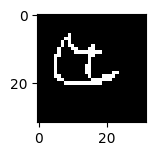

[[5]]


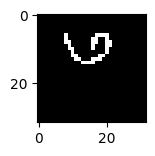

[[3]]


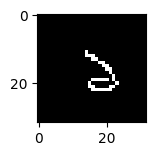

[[1]]


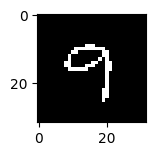

[[7]]


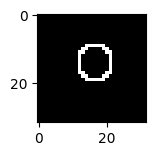

[[0]]


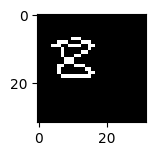

[[4]]


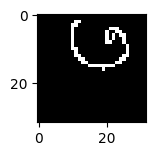

[[3]]


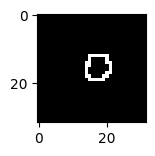

[[0]]


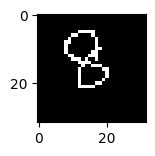

[[4]]


In [8]:
#Displaying the data
for i in range(9) :
    plt.subplot(330 + 1 + i)
    plt.imshow(X_show_all[i] , cmap=plt.get_cmap('gray'))
    plt.show()
    print((np.argmax(Y_train_all[i])).reshape(-1, 1))

In [9]:
#  Processing the test data
X_test_a=get_data(paths_test_a,resize_dim=32)
X_test_b=get_data(paths_test_b,resize_dim=32)
X_test_c=get_data(paths_test_c,resize_dim=32)
X_test_d=get_data(paths_test_d,resize_dim=32)
X_test_e=get_data(paths_test_e,resize_dim=32)
X_test_f=get_data(paths_test_f,resize_dim=32)
X_test_auga=get_data(paths_test_auga,resize_dim=32)
X_test_augc=get_data(paths_test_augc,resize_dim=32)

processed 3489/3489
processed 69/69
processed 4381/4381
processed 1948/1948
processed 2970/2970
processed 495/495
processed 2168/2168
processed 2106/2106


In [10]:
# Merging all the test data in one array
X_test_all=np.concatenate((X_test_a,X_test_b,X_test_c,X_test_d,X_test_e,X_test_f,X_test_auga,X_test_augc))

In [11]:
#  Making the RGB data to single channel
X_train_all = X_train_all.reshape(X_train_all.shape[0] , 32 , 32 , 1).astype('float32')
X_test_all = X_test_all.reshape(X_test_all.shape[0] , 32 , 32 , 1).astype('float32')

# Normalizing the data
X_train_all = X_train_all / 255
X_test_all = X_test_all / 255

In [12]:
# Shuffling the data
indices=list(range(len(X_train_all)))
np.random.seed(42)
np.random.shuffle(indices)

ind=int(len(indices)*0.80)
# train data
X_train=X_train_all[indices[:ind]] 
Y_train=Y_train_all[indices[:ind]]
# validation data
X_val=X_train_all[indices[-(len(indices)-ind):]] 
Y_val=Y_train_all[indices[-(len(indices)-ind):]]

In [13]:
#  Designing the model using Functional API from tensorflow
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape = input_shape)
    Z1 = tf.keras.layers.Conv2D(32 , (5 , 5) , 1 , padding = 'same')(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    Z2 = tf.keras.layers.Conv2D(32 , (5 , 5) , 1 , padding = 'same')(A1)
    A2 = tf.keras.layers.ReLU()(Z2)
    batch_norm1 = tf.keras.layers.BatchNormalization()(A2)
    P1 = tf.keras.layers.MaxPool2D(pool_size = (2 , 2) , strides = (2 , 2) , padding = 'same')(batch_norm1)
    Z3 = tf.keras.layers.Conv2D(64 , (3 , 3) , 1 , padding = 'same')(P1)
    A3 = tf.keras.layers.ReLU()(Z3)
    Z4 = tf.keras.layers.Conv2D(64 , (3 , 3) , 1 , padding = 'same')(A3)
    A4 = tf.keras.layers.ReLU()(Z4)
    batch_norm2 = tf.keras.layers.BatchNormalization()(A4)
    P2 = tf.keras.layers.MaxPool2D(pool_size = (2 , 2) , strides = (2 , 2) , padding = 'same')(batch_norm2)
    Z5 = tf.keras.layers.Conv2D(128 , (3 , 3) , 1 , padding = 'same')(P2)
    A5 = tf.keras.layers.ReLU()(Z5)
    Z6 = tf.keras.layers.Conv2D(128 , (3 , 3) , 1 , padding = 'same')(A5)
    A6 = tf.keras.layers.ReLU()(Z6)
    batch_norm3 = tf.keras.layers.BatchNormalization()(A6)
    P3 = tf.keras.layers.MaxPool2D(pool_size = (2 , 2) , strides = (2 , 2) , padding = 'same')(batch_norm3)
    Z7 = tf.keras.layers.Conv2D(256 , (3 , 3) , 1 , padding = 'same')(P3)
    A7 = tf.keras.layers.ReLU()(Z7)
    Z8 = tf.keras.layers.Conv2D(256 , (3 , 3) , 1 , padding = 'same')(A7)
    A8 = tf.keras.layers.ReLU()(Z8)
    batch_norm4 = tf.keras.layers.BatchNormalization()(A8)
    P4 = tf.keras.layers.MaxPool2D(pool_size = (2 , 2) , strides = (2 , 2) , padding = 'same')(batch_norm4)
    F = tf.keras.layers.Flatten()(P4)
    Z9 = tf.keras.layers.Dense(128)(F)
    A9 = tf.keras.layers.ReLU()(Z9)
    D1 = tf.keras.layers.Dropout(0.2)(A9)
    Z10 = tf.keras.layers.Dense(64)(D1)
    A10 = tf.keras.layers.ReLU()(Z10)
    D2 = tf.keras.layers.Dropout(0.2)(A10)
    outputs = tf.keras.layers.Dense(units = 10 , activation = 'softmax')(D2)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [14]:
# Displaying the design of the model and setting some arguments
conv_model = convolutional_model((32 , 32 , 1))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        832       
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 re_lu_1 (ReLU)              (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                             

In [15]:
# Training the model
tf.keras.backend.clear_session()
K.set_value(conv_model.optimizer.lr,1e-3)
history = conv_model.fit(x = X_train ,
                         y = Y_train ,
                         batch_size = 64,
                         epochs=30 ,
                         verbose = 1 ,
                         callbacks = [
                             tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1),
                             tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=1, min_lr=1e-9, verbose=1)
                         ],
                         validation_data=(X_val,Y_val),
                         shuffle = True)

Epoch 1/30
901/901 [==============================] - 20s 19ms/step - loss: 0.4945 - accuracy: 0.8370 - val_loss: 0.4121 - val_accuracy: 0.8777 - lr: 0.0010
Epoch 2/30
901/901 [==============================] - 16s 18ms/step - loss: 0.1318 - accuracy: 0.9643 - val_loss: 0.1868 - val_accuracy: 0.9490 - lr: 0.0010
Epoch 3/30
901/901 [==============================] - 16s 17ms/step - loss: 0.0939 - accuracy: 0.9741 - val_loss: 0.0897 - val_accuracy: 0.9771 - lr: 0.0010
Epoch 4/30
899/901 [============================>.] - ETA: 0s - loss: 0.0782 - accuracy: 0.9793
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
901/901 [==============================] - 16s 17ms/step - loss: 0.0781 - accuracy: 0.9793 - val_loss: 0.1443 - val_accuracy: 0.9620 - lr: 0.0010
Epoch 5/30
901/901 [==============================] - 16s 17ms/step - loss: 0.0402 - accuracy: 0.9896 - val_loss: 0.0552 - val_accuracy: 0.9854 - lr: 1.0000e-04
Epoch 6/30
901/901 [=============================

In [16]:
conv_model.save('Bengali_Handwritten_CNN.h5')

1802/1802 [==============================] - 7s 4ms/step


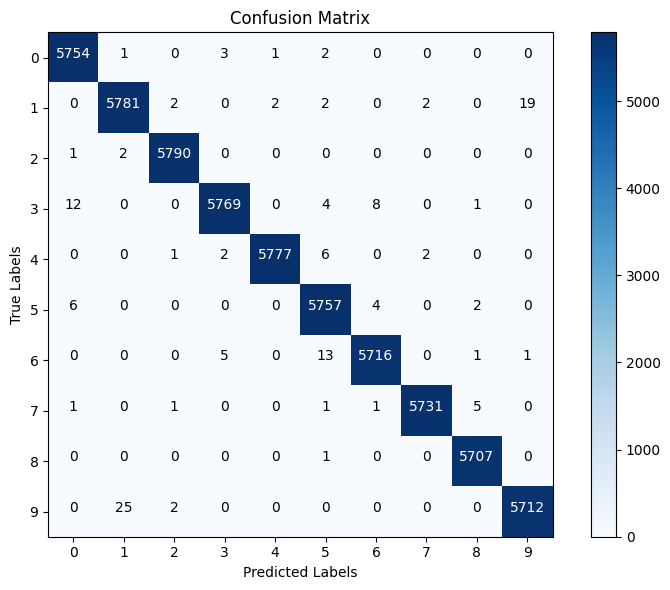

In [17]:
from sklearn.metrics import confusion_matrix
train_labels = np.argmax(Y_train , axis = 1)
predicted_labels = conv_model.predict(X_train)
predicted_labels = np.argmax(predicted_labels , axis = 1)
confusion_mat = confusion_matrix(train_labels, predicted_labels)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(10), np.arange(10))
plt.yticks(np.arange(10), np.arange(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
thresh = confusion_mat.max() / 2.
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(confusion_mat[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mat[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score
train_labels = np.argmax(Y_train , axis = 1)
predicted_labels = conv_model.predict(X_train)
predicted_labels = np.argmax(predicted_labels , axis = 1)
precision = precision_score(train_labels, predicted_labels, average='weighted')
recall = recall_score(train_labels, predicted_labels, average='weighted')
f1 = f1_score(train_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

1802/1802 [==============================] - 7s 4ms/step
Precision: 0.9975375954783594
Recall: 0.9975362620584357
F1 Score: 0.9975362210814077


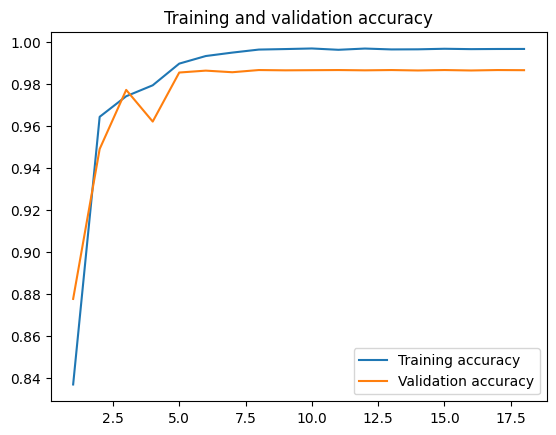

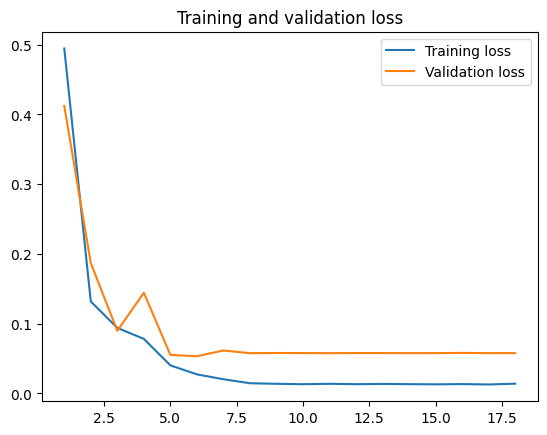

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1 , len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
data_dir = 'Bangla Digit Dataset'
path_test = glob.glob(os.path.join(data_dir,'Bangla Digit','*.jpg'))
path_label_test = os.path.join(data_dir,'Bangla Digit Dataset.csv')

In [21]:
X_test , Y_test = get_data(path_test , path_label_test , resize_dim = 32)
X_test = X_test.reshape(X_test.shape[0] , 32 , 32 , 1).astype('float32')
X_test = X_test / 255

processed 289/289


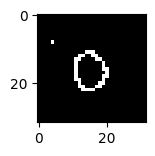

[[0]]


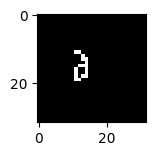

[[1]]


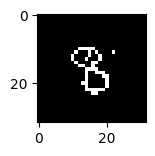

[[4]]


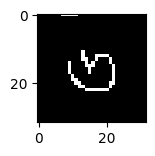

[[6]]


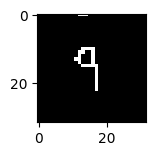

[[7]]


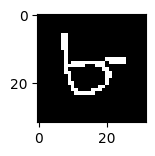

[[8]]


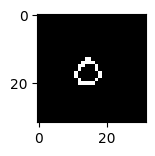

[[0]]


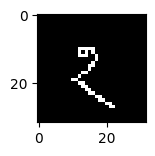

[[2]]


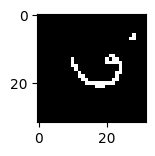

[[3]]


In [22]:
for i in range(9) :
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i] , cmap=plt.get_cmap('gray'))
    plt.show()
    print((np.argmax(Y_test[i])).reshape(-1, 1))

In [23]:
conv_model.evaluate(X_test , Y_test)

10/10 [==============================] - 0s 41ms/step - loss: 0.7885 - accuracy: 0.8720


[0.7885119318962097, 0.8719723224639893]

In [24]:
test_labels = np.argmax(Y_test , axis = 1)
predicted_labels_test = conv_model.predict(X_test)
predicted_labels_test = np.argmax(predicted_labels_test , axis = 1)
precision_test = precision_score(test_labels, predicted_labels_test, average='weighted')
recall_test = recall_score(test_labels, predicted_labels_test, average='weighted')
f1_test = f1_score(test_labels, predicted_labels_test, average='weighted')

print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

10/10 [==============================] - 0s 13ms/step
Precision: 0.8959892238438951
Recall: 0.8719723183391004
F1 Score: 0.8735741017472469


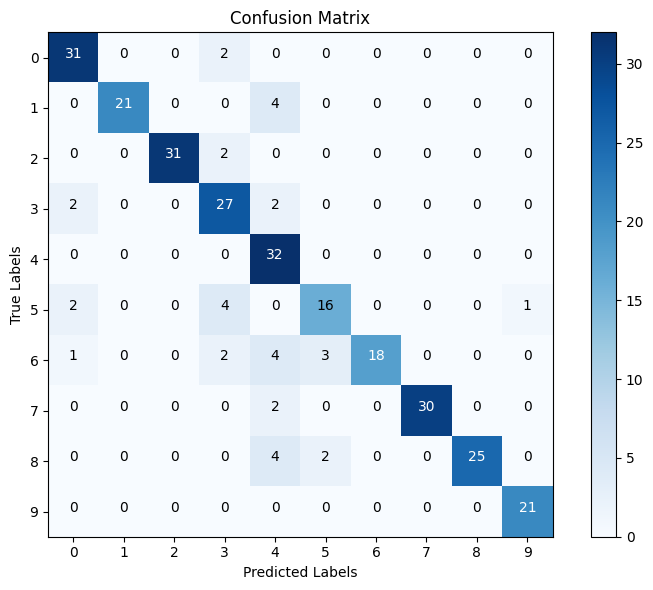

In [100]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels_test)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(10), np.arange(10))
plt.yticks(np.arange(10), np.arange(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
thresh = confusion_mat.max() / 2.
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(confusion_mat[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mat[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

#### 